# Búsqueda del camino mínimo con CLIPSPy

Este programa trata sobre encontrar la ruta más corta entre los nodos de un grafo utilizando CLIPS. Para ello debemos utilizar la librería de CLIPSPy en Python.

## Preparación del programa

### Instalación de ClipsPy

Realizar si no está instalada en el entorno, mediante uno de los siguientes comandos:

```
pip install clipspy
```

```
!pip install clipspy
```

```
%pip install clipspy
```

In [1]:
pip install clipspy

  Obtaining dependency information for clipspy from https://files.pythonhosted.org/packages/48/84/50e9dc38c6bc61dd6b65c6bcf8022581c17b64bcb469bf07b98f41ad892a/clipspy-1.0.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cffi>=1.0.0 from https://files.pythonhosted.org/packages/e9/63/e285470a4880a4f36edabe4810057bd4b562c6ddcc165eacf9c3c7210b40/cffi-1.16.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pycparser from https://files.pythonhosted.org/packages/62/d5/5f610ebe421e85889f2e55e33b7f9a6795bd982198517d912eb1c76e1a53/pycparser-2.21-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/718.3 kB ? eta -:--:--
    --------------------------------------- 10.2/718.3 kB ? eta -:--:--
   ------ --------------------------------- 122.9/718.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------- ----------- 512.0/718.3 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 718.3/718.3 kB 5.0 MB/s eta 0


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importación de clips

In [1]:
import clips

### Preparación del entorno

El entorno de CLIPS debe ser montado en Python para poder utilizarse.

In [2]:
env = clips.Environment()

## Definición de la plantilla de aristas o rutas

La plantilla o registro se define mediante **deftemplate** y representa la estructura de los vectores ordenados de características que se van a utilizar.

Las características son las siguientes:
  * **Arista:** Cada uno de los caminos direccionados del grafo
    * **Origen:** El nodo del que parte el camino
    * **Destino:** El nodo al que va el camino
    * **Predecesores:** Los nodos por lo que se ha tenido que pasar para llegar al destino al encontrar un camino de menor coste. Este campo inicialmente no tiene valor y puede tener varios elementos, por lo que he optado por utilizar un multicampo. 

Además todas las instrucciones que construimos de CLIPS deben ser construidas en el entorno, en este caso mediante

```
env.build()
```

In [4]:
deftemplate_Arista = """
(deftemplate Arista
  (field origen)
  (field destino)
  (field peso)
	(multifield predecesores)
)
"""

env.build(deftemplate_Arista)

## Asserts de aristas (ejecutar solo uno de los dos)

Ahora establecemos los hechos definiendo los valores de las características de los grafos pertinentes, e introducimos los hechos mediante un bucle con la instrucción

```
  template.assert_fact()
```

Es importante que las rutas que no deberían existir persé estén definidas con un coste más elevado que la suma de los pesos de las rutas existentes, al menos las que queremos procesar, para que la regla de actualizar se ejecute.

### Primer grafo

Tenemos el grafo con sus rutas y el de expansión mínima. He decidio poner la ruta de **B** a **D** por lo expuesto previamente.

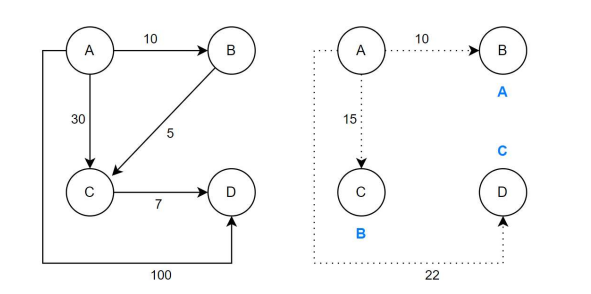

In [5]:
template = env.find_template('Arista')
facts = [
  {'origen': 'A', 'destino': 'B', 'peso': 10},
  {'origen': 'A', 'destino': 'C', 'peso': 30},
  {'origen': 'A', 'destino': 'D', 'peso': 100},
  {'origen': 'B', 'destino': 'C', 'peso': 5},
  {'origen': 'B', 'destino': 'D', 'peso': 100},
  {'origen': 'C', 'destino': 'D', 'peso': 7}
]

for fact in facts:
  template.assert_fact(origen = fact.get('origen'), destino = fact.get('destino'), peso = fact.get('peso'))

for fact in env.facts():
  print(fact)

(Arista (origen "A") (destino "B") (peso 10) (predecesores))
(Arista (origen "A") (destino "C") (peso 30) (predecesores))
(Arista (origen "A") (destino "D") (peso 100) (predecesores))
(Arista (origen "B") (destino "C") (peso 5) (predecesores))
(Arista (origen "B") (destino "D") (peso 100) (predecesores))
(Arista (origen "C") (destino "D") (peso 7) (predecesores))


### Segundo grafo

Desarrollé un grafo con la herramienta Excalidraw, pinté de azul los vértices de las rutas óptimas e hice el gráfo de expansión mínima.

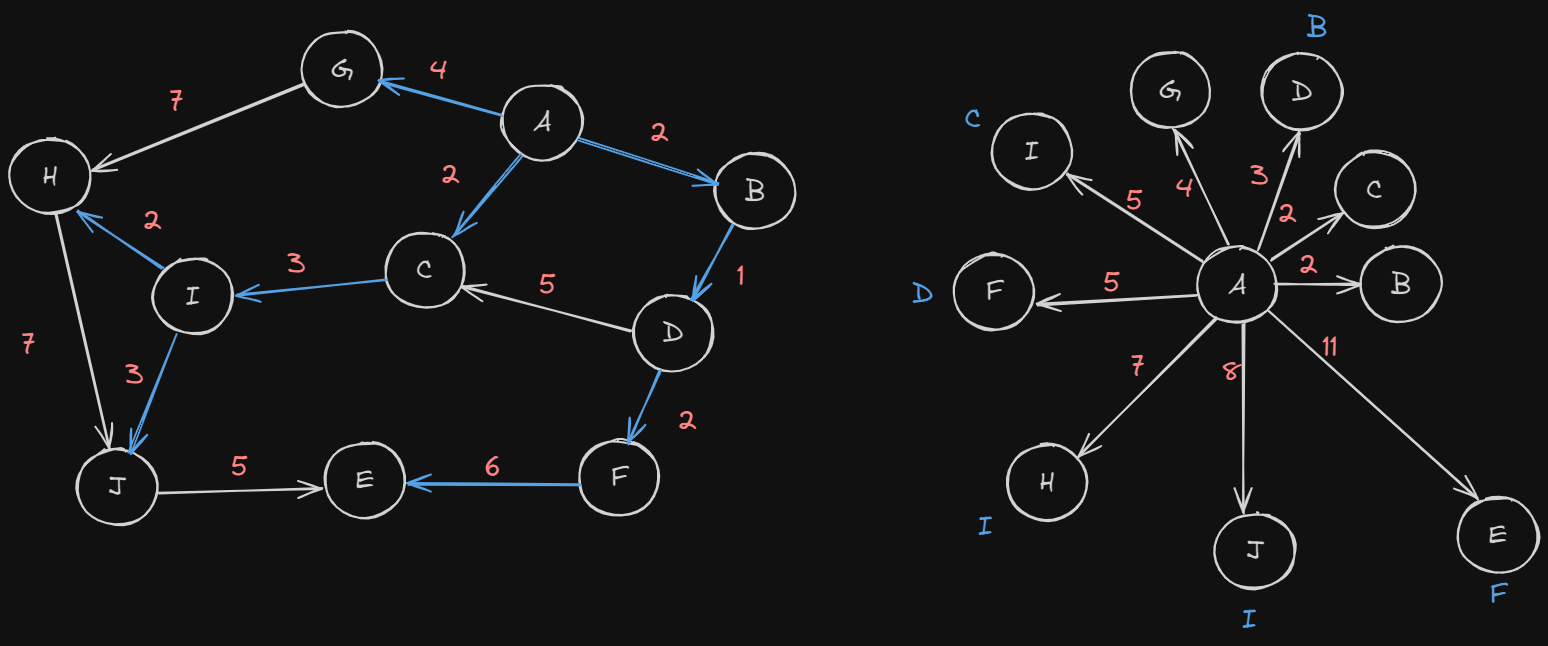

In [5]:
template = env.find_template('Arista')
facts = [
  {'origen': 'A', 'destino': 'B', 'peso': 2},
	{'origen': 'A', 'destino': 'C', 'peso': 2},
	{'origen': 'A', 'destino': 'D', 'peso': 999},
	{'origen': 'A', 'destino': 'E', 'peso': 999},
	{'origen': 'A', 'destino': 'F', 'peso': 999},
	{'origen': 'A', 'destino': 'G', 'peso': 4},
	{'origen': 'A', 'destino': 'H', 'peso': 999},
	{'origen': 'A', 'destino': 'I', 'peso': 999},
	{'origen': 'A', 'destino': 'J', 'peso': 999},

	{'origen': 'B', 'destino': 'A', 'peso': 999},
	{'origen': 'B', 'destino': 'C', 'peso': 999},
	{'origen': 'B', 'destino': 'D', 'peso': 1},
	{'origen': 'B', 'destino': 'E', 'peso': 999},
	{'origen': 'B', 'destino': 'F', 'peso': 999},
	{'origen': 'B', 'destino': 'G', 'peso': 999},
	{'origen': 'B', 'destino': 'H', 'peso': 999},
	{'origen': 'B', 'destino': 'I', 'peso': 999},
	{'origen': 'B', 'destino': 'J', 'peso': 999},

	{'origen': 'C', 'destino': 'A', 'peso': 999},
	{'origen': 'C', 'destino': 'B', 'peso': 999},
	{'origen': 'C', 'destino': 'D', 'peso': 999},
	{'origen': 'C', 'destino': 'E', 'peso': 999},
	{'origen': 'C', 'destino': 'F', 'peso': 999},
	{'origen': 'C', 'destino': 'G', 'peso': 999},
	{'origen': 'C', 'destino': 'H', 'peso': 999},
	{'origen': 'C', 'destino': 'I', 'peso': 3},
	{'origen': 'C', 'destino': 'J', 'peso': 999},

	{'origen': 'D', 'destino': 'A', 'peso': 999},
	{'origen': 'D', 'destino': 'B', 'peso': 999},
	{'origen': 'D', 'destino': 'C', 'peso': 5},
	{'origen': 'D', 'destino': 'E', 'peso': 999},
	{'origen': 'D', 'destino': 'F', 'peso': 2},
	{'origen': 'D', 'destino': 'G', 'peso': 999},
	{'origen': 'D', 'destino': 'H', 'peso': 999},
	{'origen': 'D', 'destino': 'I', 'peso': 3},
	{'origen': 'D', 'destino': 'J', 'peso': 999},

	{'origen': 'E', 'destino': 'A', 'peso': 999},
	{'origen': 'E', 'destino': 'B', 'peso': 999},
	{'origen': 'E', 'destino': 'C', 'peso': 999},
	{'origen': 'E', 'destino': 'D', 'peso': 999},
	{'origen': 'E', 'destino': 'F', 'peso': 999},
	{'origen': 'E', 'destino': 'G', 'peso': 999},
	{'origen': 'E', 'destino': 'H', 'peso': 999},
	{'origen': 'E', 'destino': 'I', 'peso': 999},
	{'origen': 'E', 'destino': 'J', 'peso': 999},

	{'origen': 'F', 'destino': 'A', 'peso': 999},
	{'origen': 'F', 'destino': 'B', 'peso': 999},
	{'origen': 'F', 'destino': 'C', 'peso': 999},
	{'origen': 'F', 'destino': 'D', 'peso': 999},
	{'origen': 'F', 'destino': 'E', 'peso': 6},
	{'origen': 'F', 'destino': 'G', 'peso': 999},
	{'origen': 'F', 'destino': 'H', 'peso': 999},
	{'origen': 'F', 'destino': 'I', 'peso': 999},
	{'origen': 'F', 'destino': 'J', 'peso': 999},

	{'origen': 'G', 'destino': 'A', 'peso': 999},
	{'origen': 'G', 'destino': 'B', 'peso': 999},
	{'origen': 'G', 'destino': 'C', 'peso': 999},
	{'origen': 'G', 'destino': 'D', 'peso': 999},
	{'origen': 'G', 'destino': 'E', 'peso': 999},
	{'origen': 'G', 'destino': 'F', 'peso': 999},
	{'origen': 'G', 'destino': 'H', 'peso': 7},
	{'origen': 'G', 'destino': 'I', 'peso': 999},
	{'origen': 'G', 'destino': 'J', 'peso': 999},

	{'origen': 'H', 'destino': 'A', 'peso': 999},
	{'origen': 'H', 'destino': 'B', 'peso': 999},
	{'origen': 'H', 'destino': 'C', 'peso': 999},
	{'origen': 'H', 'destino': 'D', 'peso': 999},
	{'origen': 'H', 'destino': 'E', 'peso': 999},
	{'origen': 'H', 'destino': 'F', 'peso': 999},
	{'origen': 'H', 'destino': 'G', 'peso': 999},
	{'origen': 'H', 'destino': 'I', 'peso': 999},
	{'origen': 'H', 'destino': 'J', 'peso': 7},

	{'origen': 'I', 'destino': 'A', 'peso': 999},
	{'origen': 'I', 'destino': 'B', 'peso': 999},
	{'origen': 'I', 'destino': 'C', 'peso': 999},
	{'origen': 'I', 'destino': 'D', 'peso': 999},
	{'origen': 'I', 'destino': 'E', 'peso': 999},
	{'origen': 'I', 'destino': 'F', 'peso': 999},
	{'origen': 'I', 'destino': 'G', 'peso': 999},
	{'origen': 'I', 'destino': 'H', 'peso': 2},
	{'origen': 'I', 'destino': 'J', 'peso': 3},

	{'origen': 'J', 'destino': 'A', 'peso': 999},
	{'origen': 'J', 'destino': 'B', 'peso': 999},
	{'origen': 'J', 'destino': 'C', 'peso': 999},
	{'origen': 'J', 'destino': 'D', 'peso': 999},
	{'origen': 'J', 'destino': 'E', 'peso': 5},
	{'origen': 'J', 'destino': 'F', 'peso': 999},
	{'origen': 'J', 'destino': 'G', 'peso': 999},
	{'origen': 'J', 'destino': 'H', 'peso': 999},
	{'origen': 'J', 'destino': 'I', 'peso': 999}
]

for fact in facts:
  template.assert_fact(origen = fact.get('origen'), destino = fact.get('destino'), peso = fact.get('peso'))

for fact in env.facts():
  print(fact)

(Arista (origen "A") (destino "B") (peso 2) (predecesores))
(Arista (origen "A") (destino "C") (peso 2) (predecesores))
(Arista (origen "A") (destino "D") (peso 999) (predecesores))
(Arista (origen "A") (destino "E") (peso 999) (predecesores))
(Arista (origen "A") (destino "F") (peso 999) (predecesores))
(Arista (origen "A") (destino "G") (peso 4) (predecesores))
(Arista (origen "A") (destino "H") (peso 999) (predecesores))
(Arista (origen "A") (destino "I") (peso 999) (predecesores))
(Arista (origen "A") (destino "J") (peso 999) (predecesores))
(Arista (origen "B") (destino "A") (peso 999) (predecesores))
(Arista (origen "B") (destino "C") (peso 999) (predecesores))
(Arista (origen "B") (destino "D") (peso 1) (predecesores))
(Arista (origen "B") (destino "E") (peso 999) (predecesores))
(Arista (origen "B") (destino "F") (peso 999) (predecesores))
(Arista (origen "B") (destino "G") (peso 999) (predecesores))
(Arista (origen "B") (destino "H") (peso 999) (predecesores))
(Arista (origen 

## Regla de actualizar las rutas

Las reglas en CLIPS se crean mediante **deffrule** y ahora detallamos la funcionalidad de la regla para actualizar las rutas.

Para ir de un nodo **A** a otro **C** pasando por uno intermedio **B** deben existir:
  * Una ruta entre **A** e **B**
  * Una ruta entre **B** y **C**

Si el peso de esas dos rutas juntas es menor que el coste entre la ruta objetivo, este coste se actualizará con la suma. No solo debe modificarse el coste, si no que ahora debemos incluir **B** entre los predecesores, por lo que debemos incluirlo en el campo.

Además de lo expuesto debemos entender que en las rutas intermedias pueden existir también esos nodos intermedios, basta con coger los predecesores de la segunda ruta intermedia, puesto a que la regla se aplica para todos los casos (lo que implica que al igual que en un caso una ruta puede ser la segunda, en otros es la primera, por lo que sería redundante y se duplicarían nodos intermedios).

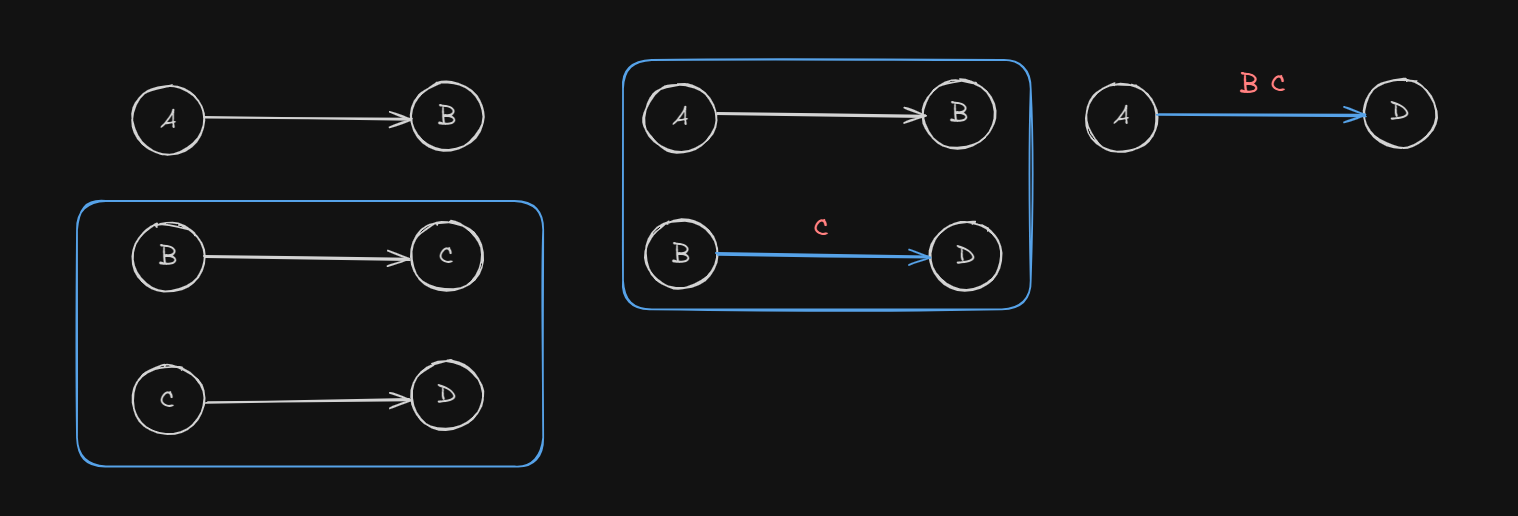

In [6]:
deffrule_Actualiza = """
(defrule Actualiza
	?uno <- (Arista (origen ?X) (destino ?Y) (peso ?C))
	?dos <- (Arista (origen ?Y) (destino ?Z) (peso ?D) (predecesores $?P))
	?tres <- (Arista (origen ?X) (destino ?Z) (peso ?E))
  (test (> ?E (+ ?C ?D)))
	=>
	(modify ?tres (origen ?X) (destino ?Z) (peso (+ ?C ?D)) (predecesores ?Y $?P))
)
"""

env.build(deffrule_Actualiza)

### Ejecutamos la regla

Mediante la instrucción
```
env.run()
```
e imprimimos los hechos.

Los pesos deben coincidir ahora con los del grafo de expansión mínima.

In [7]:
env.run()
for fact in env.facts():
  print(fact)

(Arista (origen "A") (destino "B") (peso 10) (predecesores))
(Arista (origen "A") (destino "C") (peso 15) (predecesores "B"))
(Arista (origen "A") (destino "D") (peso 22) (predecesores "B" "C"))
(Arista (origen "B") (destino "C") (peso 5) (predecesores))
(Arista (origen "B") (destino "D") (peso 12) (predecesores "C"))
(Arista (origen "C") (destino "D") (peso 7) (predecesores))


## Imprimimos los resultados

Para imprimir la ruta deseada obtenemos por consola el origen y destino de la ruta que queremos encontrar, nos recorremos los hechos para encontrar aquel cuyo origen y destino sea el mismo que introducimos, por lo que debemos realizar un *slice* del hecho para el origen y otro para el destino.

Al verificar dicha comparación obtenemos el peso buscando a partir de una posición hasta otra del fin del peso, buscamos el inicio y el fin del campo de predecesores para almacenarlo también y acabamos con el bucle al haber encontrado la ruta que queríamos.

Finalmente imprimimos la ruta con las variables que hemos obtenido. Si no se encontró porque hemos introducido mal los datos pues dirá que no se encontró.

In [11]:
origen = input("Seleccione el origen: ").upper()
destino = input("Seleccione el destino: ").upper()
predecesores = False
peso = False

for fact in env.facts():
  hecho = str(fact)
  origen_temp = hecho[17:18]
  destino_temp = hecho[31:32]
  if origen_temp == origen and destino_temp == destino:
    fin_peso = hecho.find(")", 41)
    peso = hecho[41:fin_peso]
    pos_predecesores = hecho.find("predecesores")+14
    fin_predecesores = hecho.find(")", pos_predecesores)
    predecesores = hecho[pos_predecesores:fin_predecesores]
    break
  
if predecesores and peso:
  res = f"La ruta más corta desde el origen {origen} al destino {destino} es: {origen} {predecesores} {destino} con un coste de {peso}"
  res = res.replace("\"", "")
  print(res)
else:
  print("No se encontró")

La ruta más corta desde el origen A al destino D es: A B C D con un coste de 22
